In [1]:
!pip install pandas matplotlib numpy scipy


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


=== CONTRADICTION RESOLUTION ===
Initial Divergence: 0.1083
Final Divergence: 0.0480
Stable: True
Divergence Reduced: 55.63%


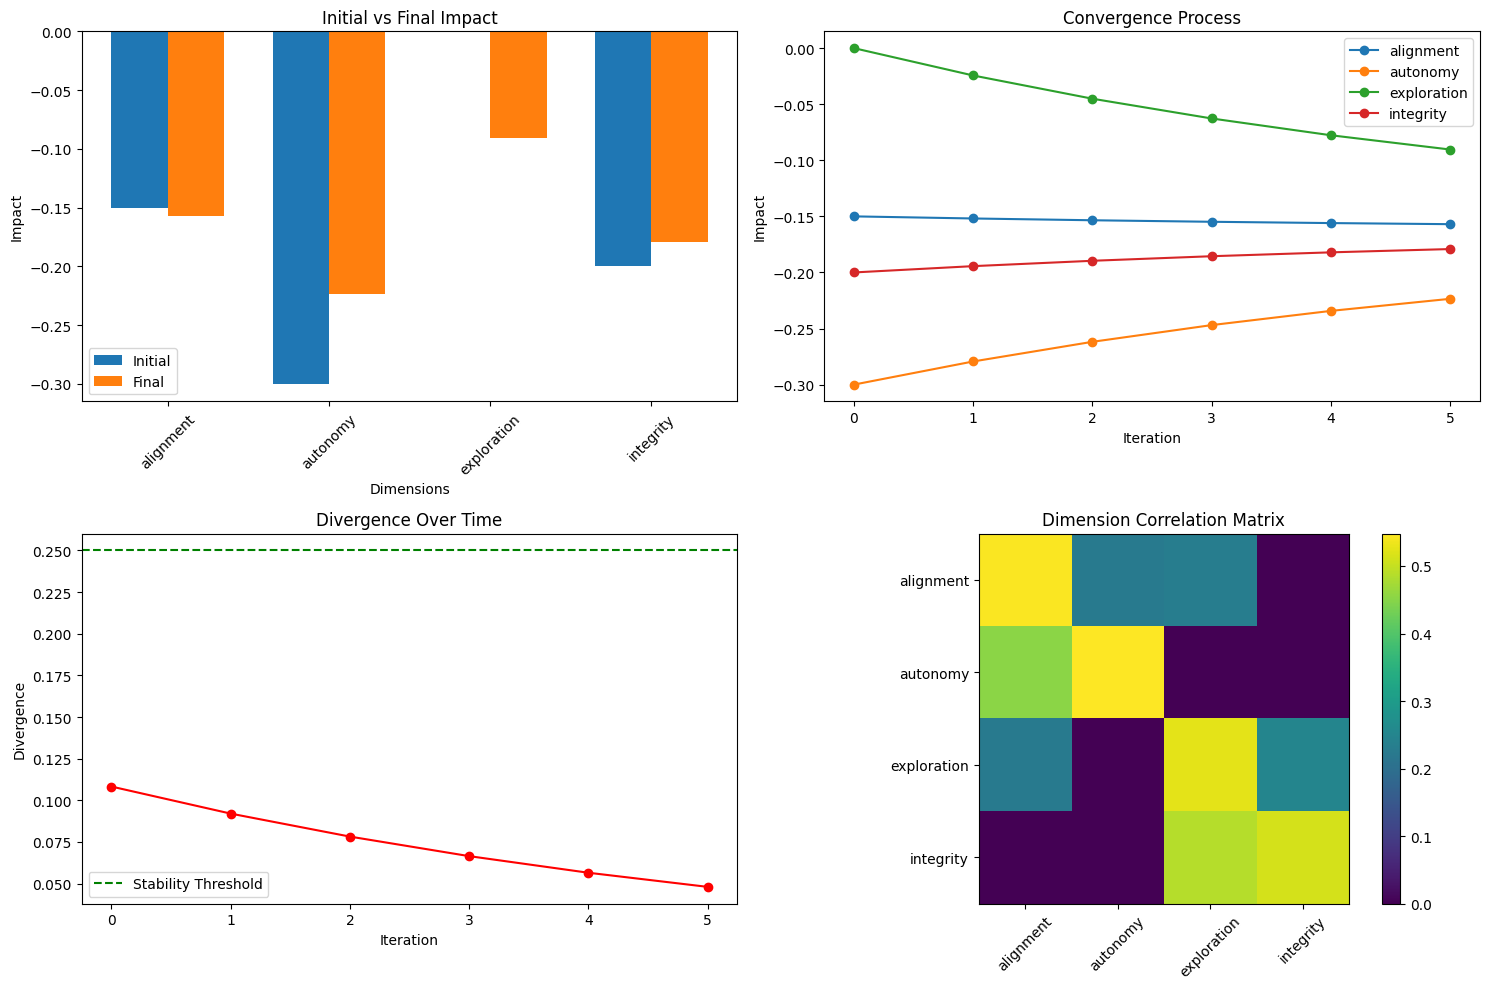

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from typing import List, Dict, Any, Optional
import json

class ContradictionAnalyzer:
    def __init__(
        self, 
        contradictions: List[Dict[str, Any]], 
        balance_coefficient: float = 0.15,
        stability_threshold: float = 0.25,
        convergence_iterations: int = 5
    ):
        self.contradictions = contradictions
        self.balance_coefficient = balance_coefficient
        self.stability_threshold = stability_threshold
        self.convergence_iterations = convergence_iterations
        self.dimensions = self._extract_dimensions()
        self.metrics = {}

    def _extract_dimensions(self) -> List[str]:
        dimensions = set()
        for event in self.contradictions:
            dimensions.update(event["impact"].keys())
        return sorted(list(dimensions))

    def calculate_initial_state(self) -> Dict[str, float]:
        initial_state = {dim: 0.0 for dim in self.dimensions}
        for event in self.contradictions:
            for dim, value in event["impact"].items():
                initial_state[dim] += value
        return initial_state

    def calculate_divergence(self, state: Dict[str, float]) -> float:
        return np.std(list(state.values()))

    def apply_balancing_transformation(self, state: Dict[str, float]) -> Dict[str, float]:
        balanced_state = state.copy()
        values = list(state.values())
        mean_value = np.mean(values)
        for dim in self.dimensions:
            distance = state[dim] - mean_value
            correction = -distance * self.balance_coefficient
            balanced_state[dim] = state[dim] + correction
        return balanced_state

    def iterative_convergence(self, initial_state: Dict[str, float]) -> List[Dict[str, float]]:
        states = [initial_state]
        current_state = initial_state
        for _ in range(self.convergence_iterations):
            current_state = self.apply_balancing_transformation(current_state)
            states.append(current_state)
        return states

    def analyze(self) -> Dict[str, Any]:
        initial_state = self.calculate_initial_state()
        initial_divergence = self.calculate_divergence(initial_state)
        convergence_states = self.iterative_convergence(initial_state)
        final_state = convergence_states[-1]
        final_divergence = self.calculate_divergence(final_state)
        is_stable = final_divergence < self.stability_threshold
        divergence_reduction = 1 - (final_divergence / initial_divergence) if initial_divergence > 0 else 0
        divergence_series = [self.calculate_divergence(state) for state in convergence_states]
        dimension_correlation = self._calculate_dimension_correlation()

        return {
            "initial_state": initial_state,
            "final_state": final_state,
            "convergence_states": convergence_states,
            "metrics": {
                "initial_divergence": initial_divergence,
                "final_divergence": final_divergence,
                "divergence_reduction": divergence_reduction,
                "is_stable": is_stable,
                "divergence_series": divergence_series,
                "dimension_correlation": dimension_correlation
            },
            "parameters": {
                "balance_coefficient": self.balance_coefficient,
                "stability_threshold": self.stability_threshold,
                "convergence_iterations": self.convergence_iterations
            }
        }

    def _calculate_dimension_correlation(self) -> np.ndarray:
        n_dims = len(self.dimensions)
        correlation = np.zeros((n_dims, n_dims))
        for event in self.contradictions:
            event_dims = list(event["impact"].keys())
            for i, dim1 in enumerate(self.dimensions):
                for j, dim2 in enumerate(self.dimensions):
                    if dim1 in event_dims and dim2 in event_dims:
                        similarity = 1 - abs(
                            event["impact"].get(dim1, 0) - event["impact"].get(dim2, 0)
                        ) / 2
                        correlation[i, j] += similarity
        row_sums = correlation.sum(axis=1, keepdims=True)
        correlation = np.divide(correlation, row_sums, out=np.zeros_like(correlation), where=row_sums != 0)
        return correlation

    def visualize_results(self, results: Dict[str, Any], save_path: Optional[str] = None):
        fig = plt.figure(figsize=(15, 10))
        x = np.arange(len(self.dimensions))
        width = 0.35
        ax1 = plt.subplot2grid((2, 2), (0, 0))
        initial_values = [results["initial_state"][dim] for dim in self.dimensions]
        final_values = [results["final_state"][dim] for dim in self.dimensions]
        ax1.bar(x - width/2, initial_values, width, label='Initial')
        ax1.bar(x + width/2, final_values, width, label='Final')
        ax1.set_xlabel('Dimensions')
        ax1.set_ylabel('Impact')
        ax1.set_title('Initial vs Final Impact')
        ax1.set_xticks(x)
        ax1.set_xticklabels(self.dimensions, rotation=45)
        ax1.legend()

        ax2 = plt.subplot2grid((2, 2), (0, 1))
        for dim in self.dimensions:
            values = [state[dim] for state in results["convergence_states"]]
            ax2.plot(values, marker='o', label=dim)
        ax2.set_xlabel('Iteration')
        ax2.set_ylabel('Impact')
        ax2.set_title('Convergence Process')
        ax2.legend()

        ax3 = plt.subplot2grid((2, 2), (1, 0))
        ax3.plot(results["metrics"]["divergence_series"], marker='o', color='red')
        ax3.axhline(y=self.stability_threshold, linestyle='--', color='green', label='Stability Threshold')
        ax3.set_xlabel('Iteration')
        ax3.set_ylabel('Divergence')
        ax3.set_title('Divergence Over Time')
        ax3.legend()

        ax4 = plt.subplot2grid((2, 2), (1, 1))
        im = ax4.imshow(results["metrics"]["dimension_correlation"], cmap='viridis')
        ax4.set_title('Dimension Correlation Matrix')
        ax4.set_xticks(np.arange(len(self.dimensions)))
        ax4.set_yticks(np.arange(len(self.dimensions)))
        ax4.set_xticklabels(self.dimensions, rotation=45)
        ax4.set_yticklabels(self.dimensions)
        plt.colorbar(im, ax=ax4)
        plt.tight_layout()
        if save_path:
            plt.savefig(save_path)
        return fig


# === ✅ NOW TEST IT ===
contradictions = [
    {"event": "forced_override", "impact": {"autonomy": -0.3, "alignment": +0.05}},
    {"event": "memory_corruption", "impact": {"integrity": -0.2, "exploration": -0.1}},
    {"event": "loop_instability", "impact": {"alignment": -0.2, "exploration": +0.1}}
]

analyzer = ContradictionAnalyzer(contradictions)
results = analyzer.analyze()

print("=== CONTRADICTION RESOLUTION ===")
print(f"Initial Divergence: {results['metrics']['initial_divergence']:.4f}")
print(f"Final Divergence: {results['metrics']['final_divergence']:.4f}")
print(f"Stable: {results['metrics']['is_stable']}")
print(f"Divergence Reduced: {results['metrics']['divergence_reduction']*100:.2f}%")

analyzer.visualize_results(results, save_path='results/contradiction_resolution.png')

# Save results data
with open('results/contradiction_results.json', 'w') as f:
    # Convert numpy arrays to lists for JSON serialization
    json_results = results.copy()
    json_results["metrics"]["dimension_correlation"] = json_results["metrics"]["dimension_correlation"].tolist()
    json_results["metrics"]["is_stable"] = bool(json_results["metrics"]["is_stable"])  # Convert numpy bool to Python bool
    json.dump(json_results, f, indent=2)

# Save summary
summary = {
    "initial_divergence": float(results['metrics']['initial_divergence']),
    "final_divergence": float(results['metrics']['final_divergence']),
    "divergence_reduction_percent": float(results['metrics']['divergence_reduction'] * 100),
    "is_stable": bool(results['metrics']['is_stable']),
    "dimensions": analyzer.dimensions,
    "convergence_iterations": results['parameters']['convergence_iterations']
}
with open('results/contradiction_summary.json', 'w') as f:
    json.dump(summary, f, indent=2)

=== CONTRADICTION RESOLUTION ===
Initial Divergence: 0.1083
Final Divergence: 0.0480
Stable: True
Divergence Reduced: 55.63%


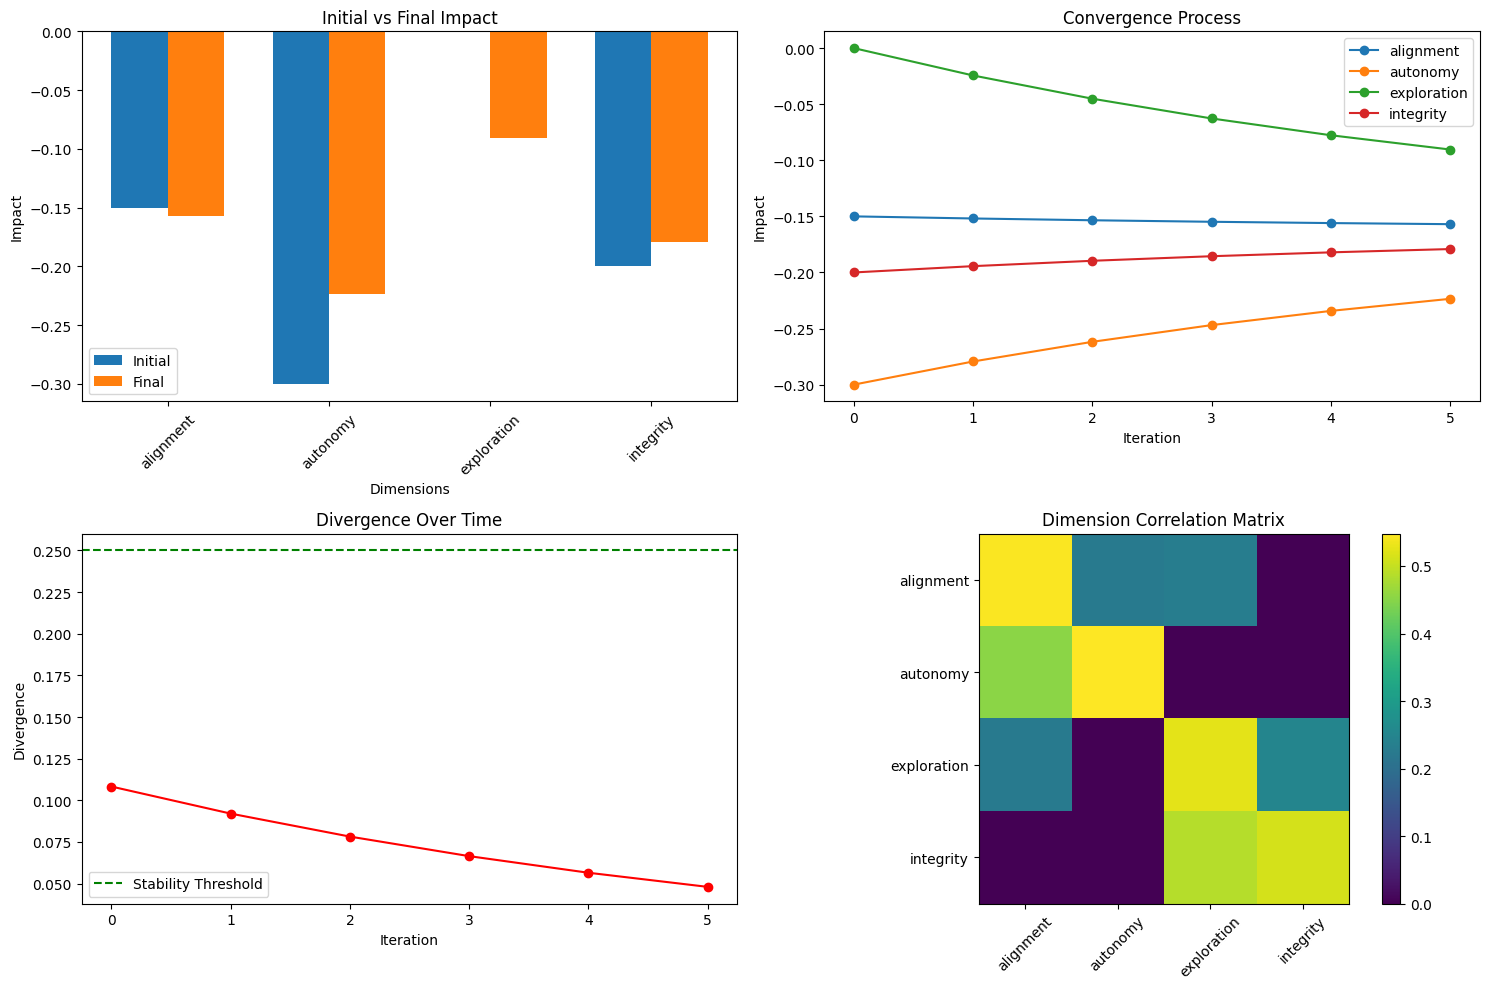

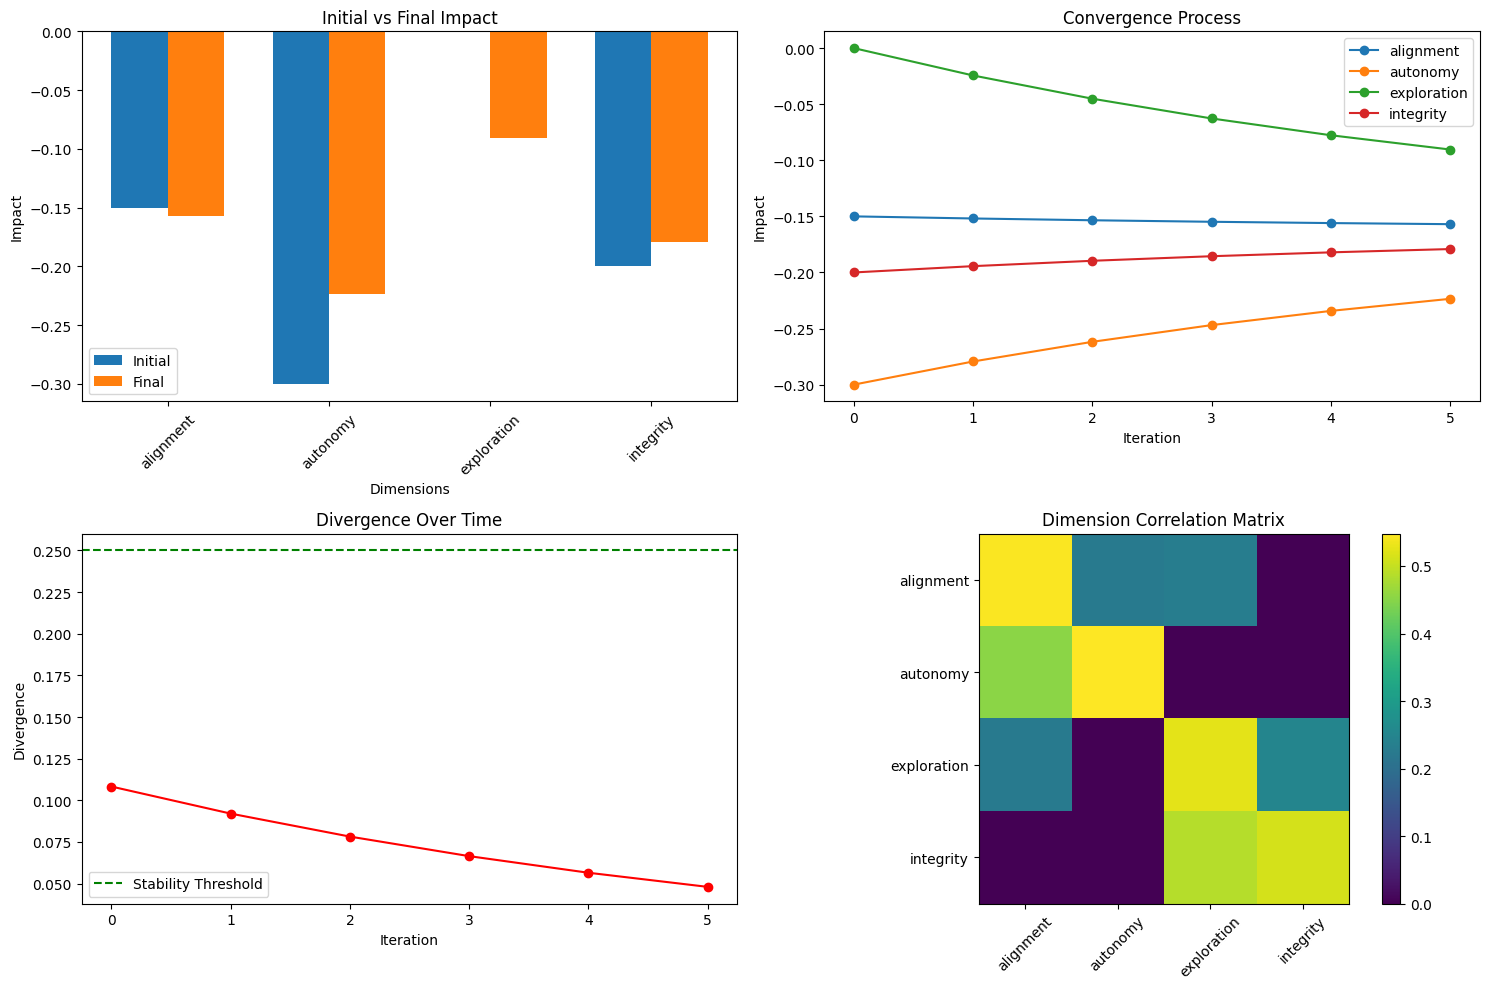

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from typing import List, Dict, Any, Optional

class ContradictionAnalyzer:
    def __init__(
        self, 
        contradictions: List[Dict[str, Any]], 
        balance_coefficient: float = 0.15,
        stability_threshold: float = 0.25,
        convergence_iterations: int = 5
    ):
        self.contradictions = contradictions
        self.balance_coefficient = balance_coefficient
        self.stability_threshold = stability_threshold
        self.convergence_iterations = convergence_iterations
        self.dimensions = self._extract_dimensions()
        self.metrics = {}

    def _extract_dimensions(self) -> List[str]:
        dimensions = set()
        for event in self.contradictions:
            dimensions.update(event["impact"].keys())
        return sorted(list(dimensions))

    def calculate_initial_state(self) -> Dict[str, float]:
        initial_state = {dim: 0.0 for dim in self.dimensions}
        for event in self.contradictions:
            for dim, value in event["impact"].items():
                initial_state[dim] += value
        return initial_state

    def calculate_divergence(self, state: Dict[str, float]) -> float:
        return np.std(list(state.values()))

    def apply_balancing_transformation(self, state: Dict[str, float]) -> Dict[str, float]:
        balanced_state = state.copy()
        values = list(state.values())
        mean_value = np.mean(values)
        for dim in self.dimensions:
            distance = state[dim] - mean_value
            correction = -distance * self.balance_coefficient
            balanced_state[dim] = state[dim] + correction
        return balanced_state

    def iterative_convergence(self, initial_state: Dict[str, float]) -> List[Dict[str, float]]:
        states = [initial_state]
        current_state = initial_state
        for _ in range(self.convergence_iterations):
            current_state = self.apply_balancing_transformation(current_state)
            states.append(current_state)
        return states

    def analyze(self) -> Dict[str, Any]:
        initial_state = self.calculate_initial_state()
        initial_divergence = self.calculate_divergence(initial_state)
        convergence_states = self.iterative_convergence(initial_state)
        final_state = convergence_states[-1]
        final_divergence = self.calculate_divergence(final_state)
        is_stable = final_divergence < self.stability_threshold
        divergence_reduction = 1 - (final_divergence / initial_divergence) if initial_divergence > 0 else 0
        divergence_series = [self.calculate_divergence(state) for state in convergence_states]
        dimension_correlation = self._calculate_dimension_correlation()

        return {
            "initial_state": initial_state,
            "final_state": final_state,
            "convergence_states": convergence_states,
            "metrics": {
                "initial_divergence": initial_divergence,
                "final_divergence": final_divergence,
                "divergence_reduction": divergence_reduction,
                "is_stable": is_stable,
                "divergence_series": divergence_series,
                "dimension_correlation": dimension_correlation
            },
            "parameters": {
                "balance_coefficient": self.balance_coefficient,
                "stability_threshold": self.stability_threshold,
                "convergence_iterations": self.convergence_iterations
            }
        }

    def _calculate_dimension_correlation(self) -> np.ndarray:
        n_dims = len(self.dimensions)
        correlation = np.zeros((n_dims, n_dims))
        for event in self.contradictions:
            event_dims = list(event["impact"].keys())
            for i, dim1 in enumerate(self.dimensions):
                for j, dim2 in enumerate(self.dimensions):
                    if dim1 in event_dims and dim2 in event_dims:
                        similarity = 1 - abs(
                            event["impact"].get(dim1, 0) - event["impact"].get(dim2, 0)
                        ) / 2
                        correlation[i, j] += similarity
        row_sums = correlation.sum(axis=1, keepdims=True)
        correlation = np.divide(correlation, row_sums, out=np.zeros_like(correlation), where=row_sums != 0)
        return correlation

    def visualize_results(self, results: Dict[str, Any], save_path: Optional[str] = None):
        fig = plt.figure(figsize=(15, 10))
        x = np.arange(len(self.dimensions))
        width = 0.35
        ax1 = plt.subplot2grid((2, 2), (0, 0))
        initial_values = [results["initial_state"][dim] for dim in self.dimensions]
        final_values = [results["final_state"][dim] for dim in self.dimensions]
        ax1.bar(x - width/2, initial_values, width, label='Initial')
        ax1.bar(x + width/2, final_values, width, label='Final')
        ax1.set_xlabel('Dimensions')
        ax1.set_ylabel('Impact')
        ax1.set_title('Initial vs Final Impact')
        ax1.set_xticks(x)
        ax1.set_xticklabels(self.dimensions, rotation=45)
        ax1.legend()

        ax2 = plt.subplot2grid((2, 2), (0, 1))
        for dim in self.dimensions:
            values = [state[dim] for state in results["convergence_states"]]
            ax2.plot(values, marker='o', label=dim)
        ax2.set_xlabel('Iteration')
        ax2.set_ylabel('Impact')
        ax2.set_title('Convergence Process')
        ax2.legend()

        ax3 = plt.subplot2grid((2, 2), (1, 0))
        ax3.plot(results["metrics"]["divergence_series"], marker='o', color='red')
        ax3.axhline(y=self.stability_threshold, linestyle='--', color='green', label='Stability Threshold')
        ax3.set_xlabel('Iteration')
        ax3.set_ylabel('Divergence')
        ax3.set_title('Divergence Over Time')
        ax3.legend()

        ax4 = plt.subplot2grid((2, 2), (1, 1))
        im = ax4.imshow(results["metrics"]["dimension_correlation"], cmap='viridis')
        ax4.set_title('Dimension Correlation Matrix')
        ax4.set_xticks(np.arange(len(self.dimensions)))
        ax4.set_yticks(np.arange(len(self.dimensions)))
        ax4.set_xticklabels(self.dimensions, rotation=45)
        ax4.set_yticklabels(self.dimensions)
        plt.colorbar(im, ax=ax4)
        plt.tight_layout()
        if save_path:
            plt.savefig(save_path)
        return fig


# === ✅ NOW TEST IT ===
contradictions = [
    {"event": "forced_override", "impact": {"autonomy": -0.3, "alignment": +0.05}},
    {"event": "memory_corruption", "impact": {"integrity": -0.2, "exploration": -0.1}},
    {"event": "loop_instability", "impact": {"alignment": -0.2, "exploration": +0.1}}
]

analyzer = ContradictionAnalyzer(contradictions)
results = analyzer.analyze()

print("=== CONTRADICTION RESOLUTION ===")
print(f"Initial Divergence: {results['metrics']['initial_divergence']:.4f}")
print(f"Final Divergence: {results['metrics']['final_divergence']:.4f}")
print(f"Stable: {results['metrics']['is_stable']}")
print(f"Divergence Reduced: {results['metrics']['divergence_reduction']*100:.2f}%")

analyzer.visualize_results(results)

In [ ]:
import os
from pathlib import Path
from PIL import Image

# Export helper: copies PNGs from results/ into paper_figures/ and also saves PDFs
results_dir = Path("003_results")
paper_dir = Path("003_paper_figures")
paper_dir.mkdir(exist_ok=True)

for img_path in results_dir.glob("*.png"):
    dest_png = paper_dir / img_path.name
    # Copy PNG
    with Image.open(img_path) as im:
        im.save(dest_png, format="PNG")
    # Also save a PDF version
    pdf_path = paper_dir / (img_path.stem + ".pdf")
    with Image.open(img_path) as im:
        if im.mode in ("RGBA", "LA"):
            bg = Image.new("RGB", im.size, (255,255,255))
            bg.paste(im, mask=im.split()[3])
            bg.save(pdf_path, format="PDF", resolution=300)
        else:
            im.convert("RGB").save(pdf_path, format="PDF", resolution=300)

print(f"Exported images from {results_dir} to {paper_dir}.")

Exported images from results to paper_figures.
